In [2]:
#Bibek Shiwakoti
# Feb 21, 2024 Wednesday

In [3]:
# Module 5
# last class was about feature rescaling




## Outliers

In [1]:
import pandas as pd


In [4]:
df=pd.read_csv('../data/Practice_File.csv')

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.shape

(1460, 81)

In [10]:
df=pd.read_csv('../data/Practice_File.csv',usecols=['LotArea','SalePrice'])

In [11]:
df.describe()

,LotArea,SalePrice
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


In [13]:
q1 =df['SalePrice'].quantile(0.25)

q3 =df['SalePrice'].quantile(0.75)



In [14]:
IQR = q3-q1

In [16]:
print('q1:', q1)
print('q3:', q3)
print('IQR:', IQR)

q1: 129975.0
q3: 214000.0
IQR: 84025.0


In [113]:
lower_whisker = q1 - (1.5*IQR)
upper_whisker = q3 + (1.5*IQR)
print('Upper whisker:',upper_whisker)
print('Lower whisker:',lower_whisker)

Upper whisker: 340037.5
Lower whisker: 3937.5


In [26]:
print((df['SalePrice']<lower_whisker) | (df['SalePrice']>upper_whisker))

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool


In [27]:
df.shape

(1460, 2)

In [30]:
new_df=  df[((df['SalePrice']>lower_whisker) & (df['SalePrice']<upper_whisker))]

In [31]:
new_df.shape

(1399, 2)

In [32]:
## for the lot area

In [34]:
q1_lr =df['LotArea'].quantile(0.25)

q3_lr =df['LotArea'].quantile(0.75)

IQR_lr =q3_lr-q1_lr


In [126]:
lower_whisker_lr = q1 - (1.5*IQR_lr)
upper_whisker_lr = q3 + (1.5*IQR_lr)
print('Upper whisker using Lot Area:',upper_whisker_lr)
print('Lower whisker using Lot Area:',lower_whisker_lr)

Upper whisker using Lot Area: 220072.0
Lower whisker using Lot Area: 123903.0


In [45]:
new_df2=  df[((df['LotArea']>lower_whisker) & (df['LotArea']<upper_whisker))]

In [46]:
new_df2.shape

(1369, 2)

In [49]:
new_df2=  new_df[((new_df['LotArea']>lower_whisker) & (new_df['LotArea']<upper_whisker))]

In [50]:
new_df2.shape    #1339   make some correction

(1308, 2)

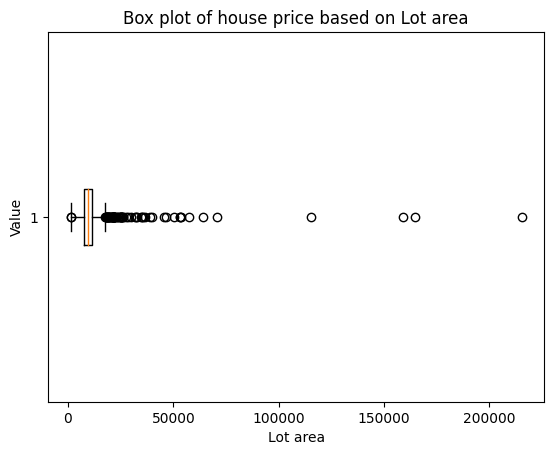

In [58]:
import matplotlib.pyplot as plt
plt.boxplot(df['LotArea'],vert=False)
plt.xlabel('Lot area')
plt.ylabel('Value')
plt.title('Box plot of house price based on Lot area')
plt.show()

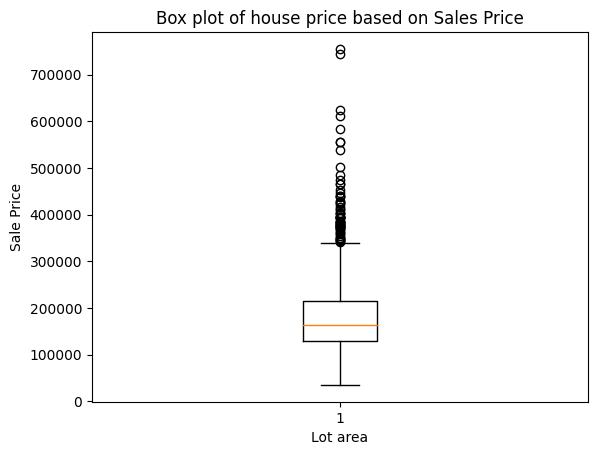

In [60]:
plt.boxplot(df['SalePrice'])
plt.xlabel('Lot area')
plt.ylabel('Sale Price')
plt.title('Box plot of house price based on Sales Price')
plt.show()

In [61]:
# use only the box plot to show the outliers

<Axes: >

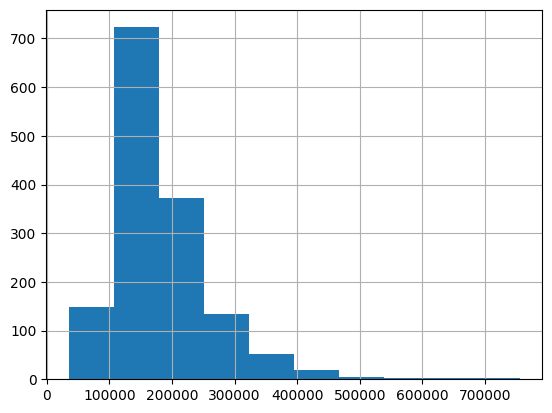

In [62]:
df['SalePrice'].hist()

Text(0, 0.5, 'Sales Price')

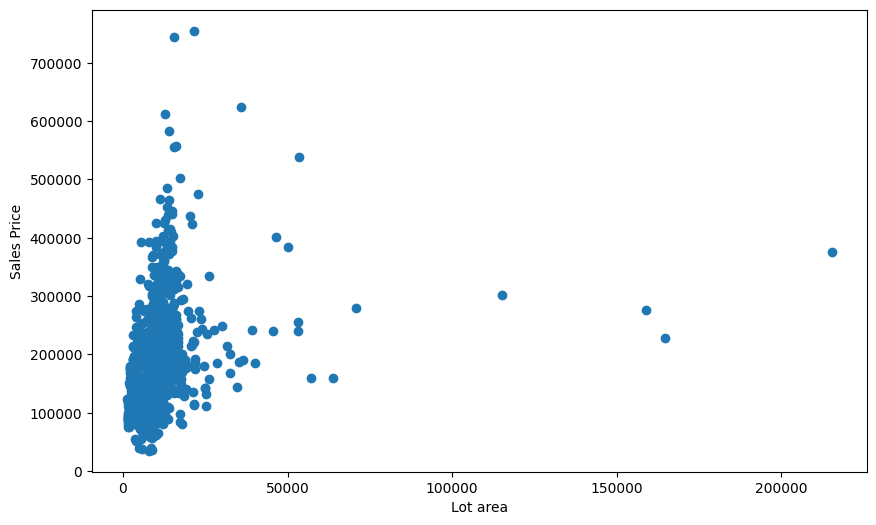

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['LotArea'],df['SalePrice'])
ax.set_xlabel('Lot area')
ax.set_ylabel('Sales Price')


In [66]:
#outlier treatments

In [67]:
#1. flooring and capping
#2. trimming
#3. Logarithims

In [83]:
floor = (df['SalePrice'].quantile(0.01))
cap = (df['SalePrice'].quantile(0.99))
print('Floor:',floor)
print('Cap:',cap)

Floor: 62150.517700000004
Cap: 442567.01000000053


In [84]:
import numpy as np
df1 = df.copy()

In [85]:
df1['SalePrice'] =np.where(df1['SalePrice']<floor,floor,df1['SalePrice'])
df1['SalePrice'] =np.where(df1['SalePrice']>cap,cap,df1['SalePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f1fda31a10>,
 'caps': [<matplotlib.lines.Line2D at 0x1f1fda38890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f1fda30890>],
 'medians': [<matplotlib.lines.Line2D at 0x1f1fda3b3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f1fd9fe150>],
 'means': []}

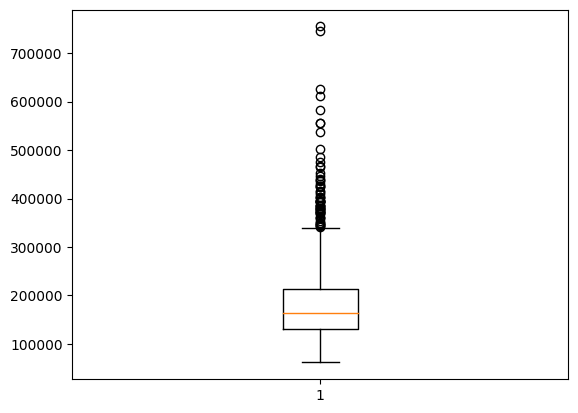

In [86]:
plt.boxplot(df['SalePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f1fee4d690>,
 'caps': [<matplotlib.lines.Line2D at 0x1f1fdc5c710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f1fee408d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f1fd8d4210>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f1fdb34e10>],
 'means': []}

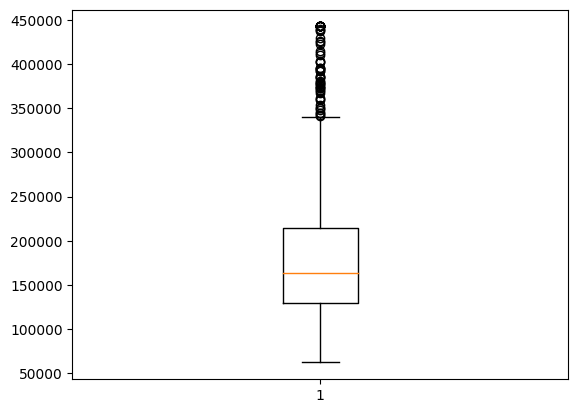

In [96]:
plt.boxplot(df1['SalePrice'])

In [97]:
#this is not as bad as above one

In [98]:
"""if we change floor by 0.10 and cap by 0.90 we can see no outliers  can see bt changing above floor and cap and re run 
the code"""

'if we change floor by 0.10 and cap by 0.90 we can see no outliers  can see bt changing above floor and cap and re run \nthe code'

In [99]:
#Trimming

In [102]:
df2 = df.copy()

In [104]:
print('Number of records in the table:',df2.shape)


Number of records in the table: (1460, 2)


In [108]:
df2.head()

,LotArea,SalePrice
0,8450,208500.0
1,9600,181500.0
2,11250,223500.0
3,9550,140000.0
4,14260,250000.0


In [118]:
index= df2[(df2['SalePrice']>upper_whisker) |
          (df2['SalePrice']<lower_whisker)].index

In [121]:
index.shape

(61,)

In [127]:
# index_lot= df2[(df2['LotArea']>upper_whisker_lr) |
#           (df2['LotArea']<lower_whisker_lr)].index

In [129]:
# index_lot.shape

(1457,)

In [130]:
# Log Transformation

In [132]:
print(df['SalePrice'].skew().round(3))

1.904


In [133]:
df['log_scale'] =df['SalePrice'].map(lambda i : np.log(i) if i>0 else 0)   #in place of map we can use apply as well
print(df['log_scale'].skew().round(2))

0.28


Text(0, 0.5, 'Frequency')

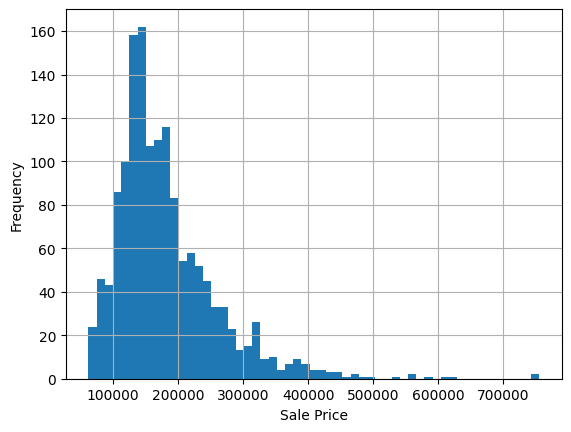

In [144]:
df['SalePrice'].hist(bins=55)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

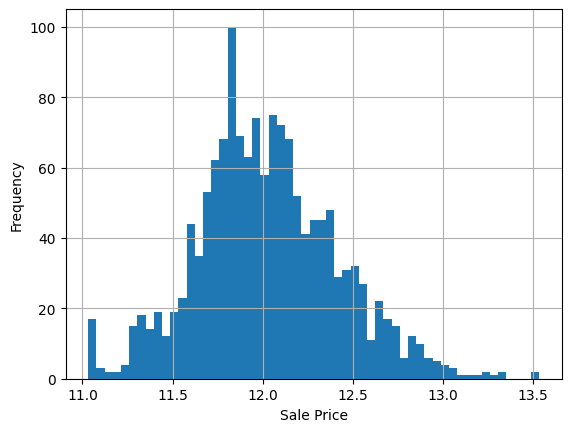

In [142]:
df['log_scale'].hist(bins=55)
plt.xlabel('Sale Price in log')
plt.ylabel('Frequency')

In [145]:
#Discretization

In [172]:
import numpy as np
from sklearn.preprocessing import Binarizer

In [180]:
age = np.array([
    [30],
    [6],
    [12],
    [20],
    [36],
    [65]]
)

In [181]:
binarizer = Binarizer(threshold=18)

In [182]:
binarizer.fit_transform(age)

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [183]:
np.digitize(age,bins=[20,30,64])

array([[2],
       [0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)